# **Importing Libraries**

In [1]:
path = '../input/'

In [2]:
import numpy as np
import pandas as pd 
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [3]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings("ignore", category=DeprecationWarning, module="urllib3.contrib.pyopenssl")
warnings.filterwarnings("ignore", category=ResourceWarning)

-----------------

--------------

# **Data Extraction**  

In [4]:
df = pd.read_csv(path+'illinois-doc-labeled-faces-dataset/person.csv',sep=';')
print(df.dtypes)

dropcols = ['name','projected_discharge_date', 'parole_date','electronic_detention_date','discharge_date','projected_parole_date','last_paroled_date','parent_institution','offender_status','location','sex_offender_registry_required','alias','Unnamed: 21']
df = df.drop(columns=dropcols)
pd.set_option('expand_frame_repr', False)
print('\n',df.head())

id                                 object
name                               object
date_of_birth                      object
weight                            float64
hair                               object
sex                                object
height                            float64
race                               object
eyes                               object
admission_date                     object
projected_parole_date              object
last_paroled_date                  object
projected_discharge_date           object
parole_date                        object
electronic_detention_date          object
discharge_date                    float64
parent_institution                 object
offender_status                    object
location                           object
sex_offender_registry_required     object
alias                              object
Unnamed: 21                       float64
dtype: object

        id date_of_birth  weight                    hair   se

# **Data Preprocessing**

In [5]:
df = df.dropna()
df

id date_of_birth  weight                    hair     sex  height   race   eyes admission_date
0      A00147    06/14/1949   185.0                   Brown    Male    67.0  White   Blue     02/16/1983
1      A00220    03/30/1957   155.0                   Black    Male    73.0  Black  Brown     05/19/2016
2      A00360    12/18/1946   167.0  Gray or Partially Gray    Male    69.0  White  Green     02/26/1988
3      A00367    01/12/1954   245.0                   Black    Male    72.0  Black  Brown     11/09/2017
4      A01054    03/25/1954   166.0         Salt and Pepper    Male    67.0  Black  Brown     12/23/1988
...       ...           ...     ...                     ...     ...     ...    ...    ...            ...
61104  Y25362    05/30/1985   120.0    Blonde or Strawberry    Male    59.0  White  Brown     10/24/2017
61105  Y25363    05/15/1986   170.0                   Brown    Male    71.0  White  Brown     10/25/2017
61106  Y25364    02/23/1972   112.0                   Brown  Female    62.0  White  Green     10/25/2017
61107  Y25365    06/16/1992   158.0                   Brown  Female    63.0  White  Brown     10/25/2017
61108  Y25366    03/04/1949   220.0  Gray or Partially Gray    Male    67.0  White   Blue     10/25/2017

[60713 rows x 9 columns]

# **Numerical Data**

In [6]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['admission_date'] = pd.to_datetime(df['admission_date'])

df['weight'] = pd.to_numeric(df['weight'])
df['height'] = pd.to_numeric(df['height'])

z_scores_height = (df['height'] - df['height'].mean()) / df['height'].std()
df = df.loc[abs(z_scores_height) < 3]

z_scores_weight = (df['weight'] - df['weight'].mean()) / df['weight'].std()
df = df.loc[abs(z_scores_weight) < 3]

print(f"Cleaned shape: {df.shape}")

Cleaned shape: (59807, 9)


------------

# **Feature Engineering**

In [7]:
df['height'] = df['height'] * 2.54 / 100
df['weight'] = df['weight'] * 0.453592
df['bmi'] = df['weight']/(df['height'])**2

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    else:
        return 'Overweight'

df['category'] = df['bmi'].apply(categorize_bmi)

In [8]:
df['age'] = (df['admission_date'] - df['date_of_birth']).astype('timedelta64[Y]')

df = df[df['age'] >= 0]

dropcols = ['date_of_birth', 'admission_date']
df = df.drop(columns=dropcols)

z_scores_age = (df['age'] - df['age'].mean()) / df['age'].std()
df = df.loc[abs(z_scores_age) < 3]

print(df.dtypes)

id           object
weight      float64
hair         object
sex          object
height      float64
race         object
eyes         object
bmi         float64
category     object
age         float64
dtype: object


-----------

---------------------

# **Data Visualization**

### **Offences Plot**

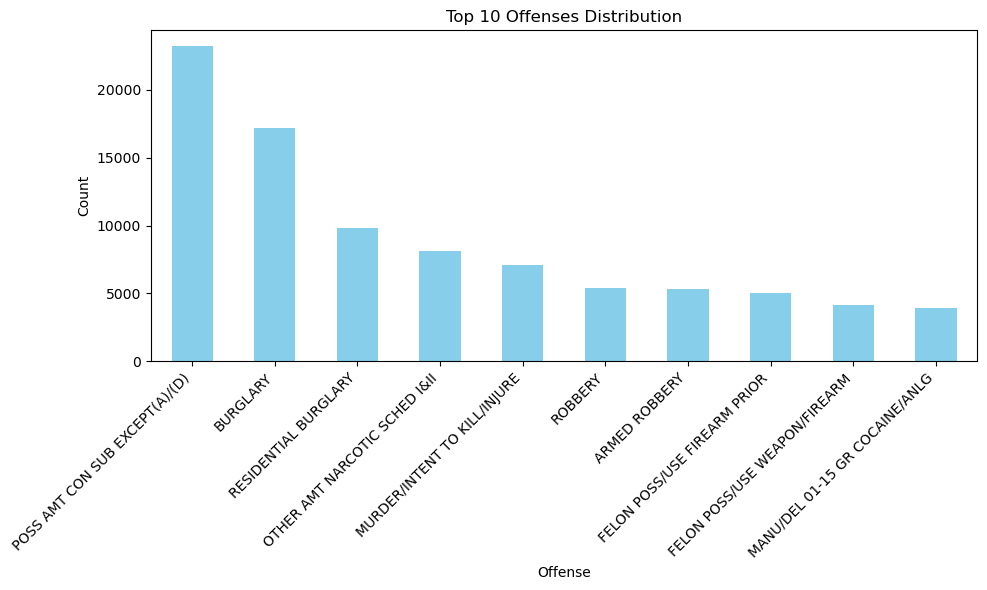

In [9]:
df_ = pd.read_csv(path+"illinois-doc-labeled-faces-dataset/sentencing.csv", sep=';')

offense_counts = df_['offense'].value_counts()

top_offenses = offense_counts.head(10)

plt.figure(figsize=(10,6))
top_offenses.plot(kind='bar', color='skyblue')
plt.title('Top 10 Offenses Distribution')
plt.xlabel('Offense')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
sns.set_theme(style="whitegrid")

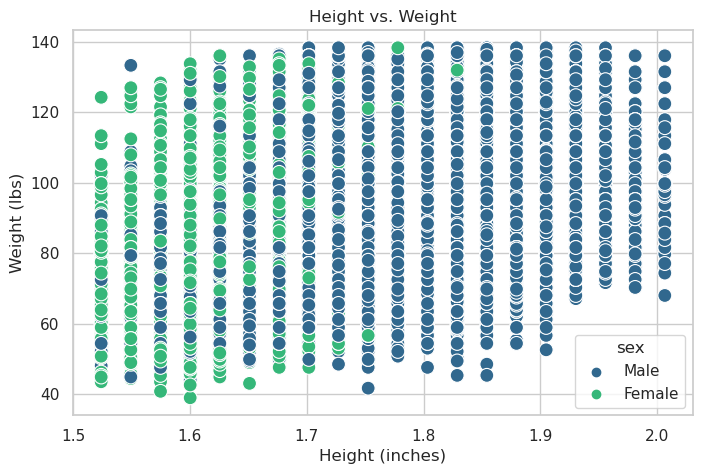

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='height', y='weight', hue='sex', palette='viridis', s=100)
plt.title('Height vs. Weight')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.show()

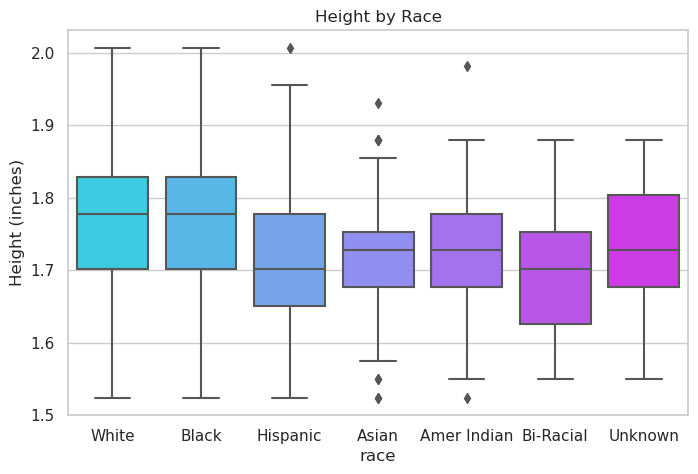

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='race', y='height', data=df, palette='cool')
plt.title('Height by Race')
plt.ylabel('Height (inches)')
plt.show()

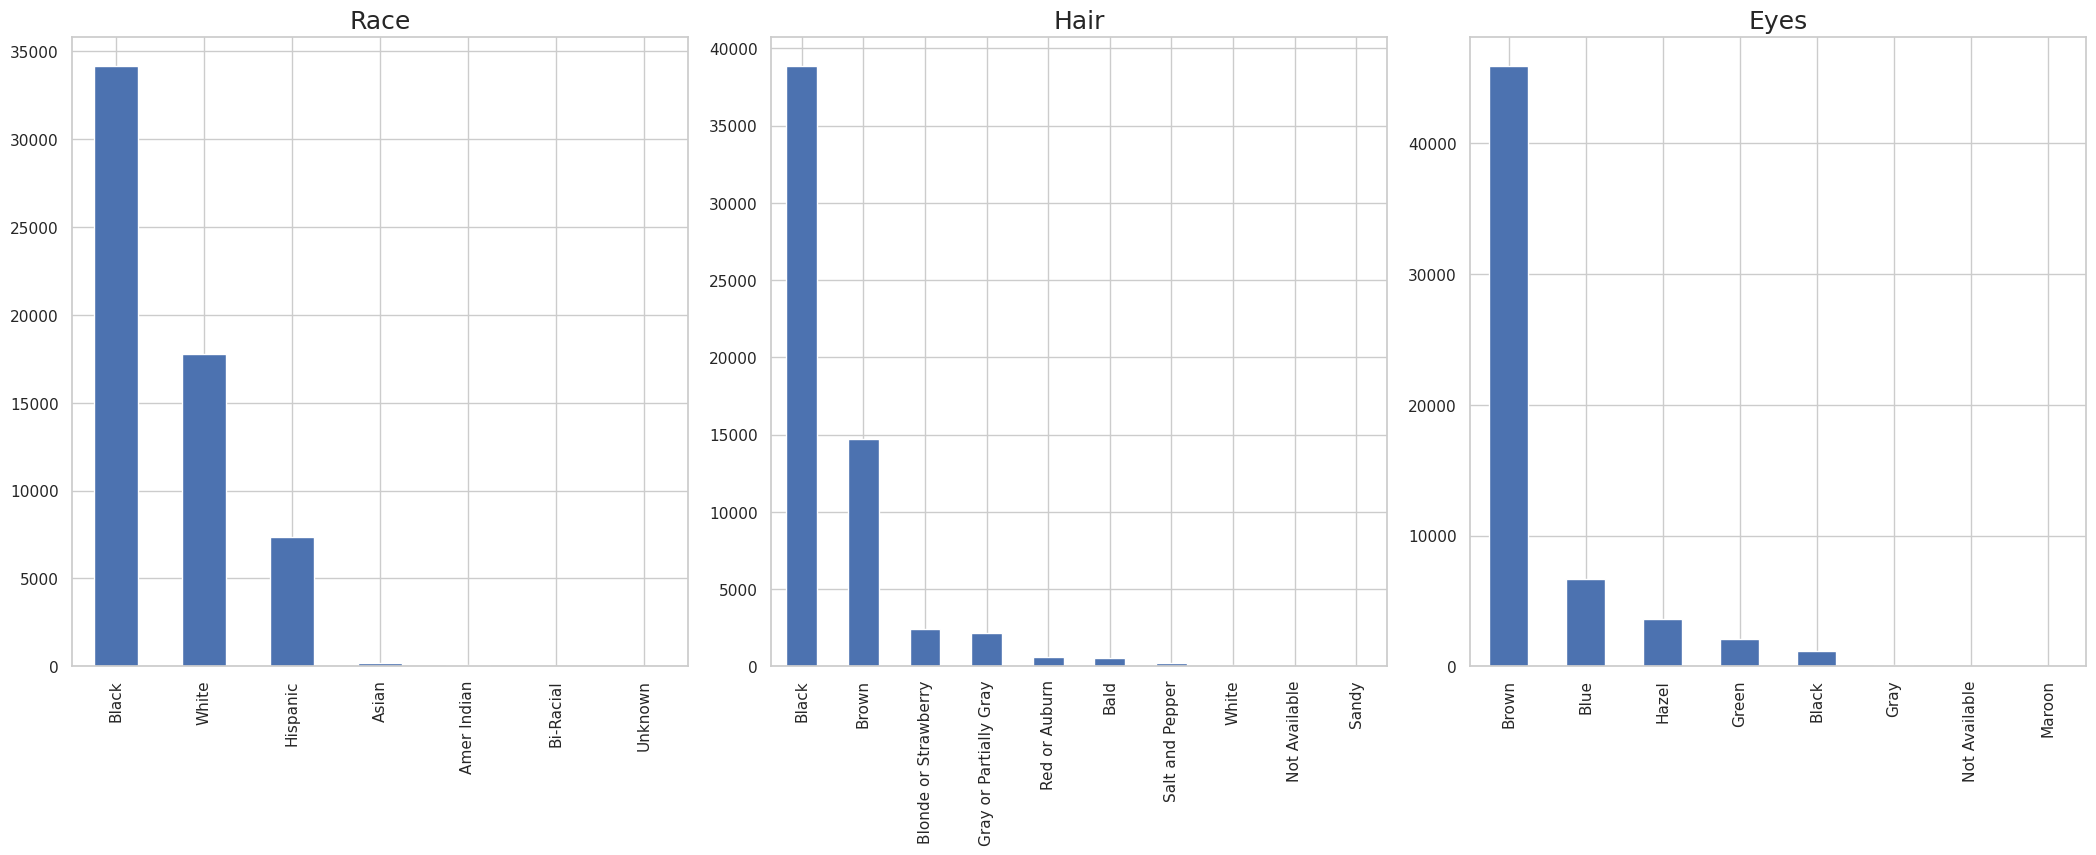

In [13]:
def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot(
        kind='bar', ax=ax
    )
    ax.set_title(col.capitalize(), fontsize=18)
    ax.set_xlabel("")
    return ax

cols = ['race', 'hair', 'eyes']

num_cols = len(cols)
fig, axes = plt.subplots(1, num_cols, figsize=(7 * num_cols, 7))
fig.tight_layout(h_pad=2, w_pad=2)

if num_cols == 1:
    axes = [axes]

for i, col in enumerate(cols):
    plot_dist(col, axes[i])

plt.show()

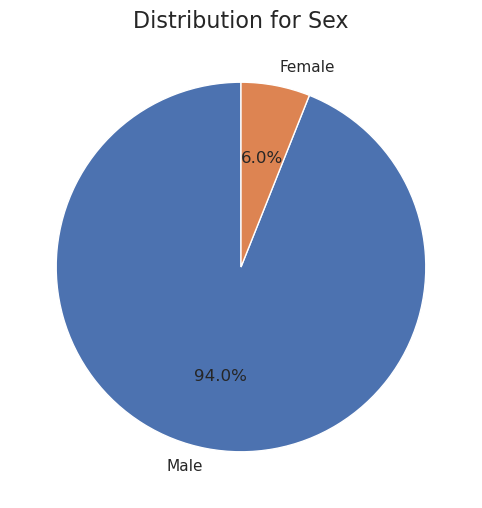

In [14]:
def plot_distribution(pd_series):
    filtered_series = pd_series.dropna()
    
    labels = filtered_series.value_counts().index.tolist()
    counts = filtered_series.value_counts().values.tolist()
    
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    plt.title(f"Distribution for {pd_series.name.capitalize()}", fontsize=16)
    plt.show()

plot_distribution(df['sex'])

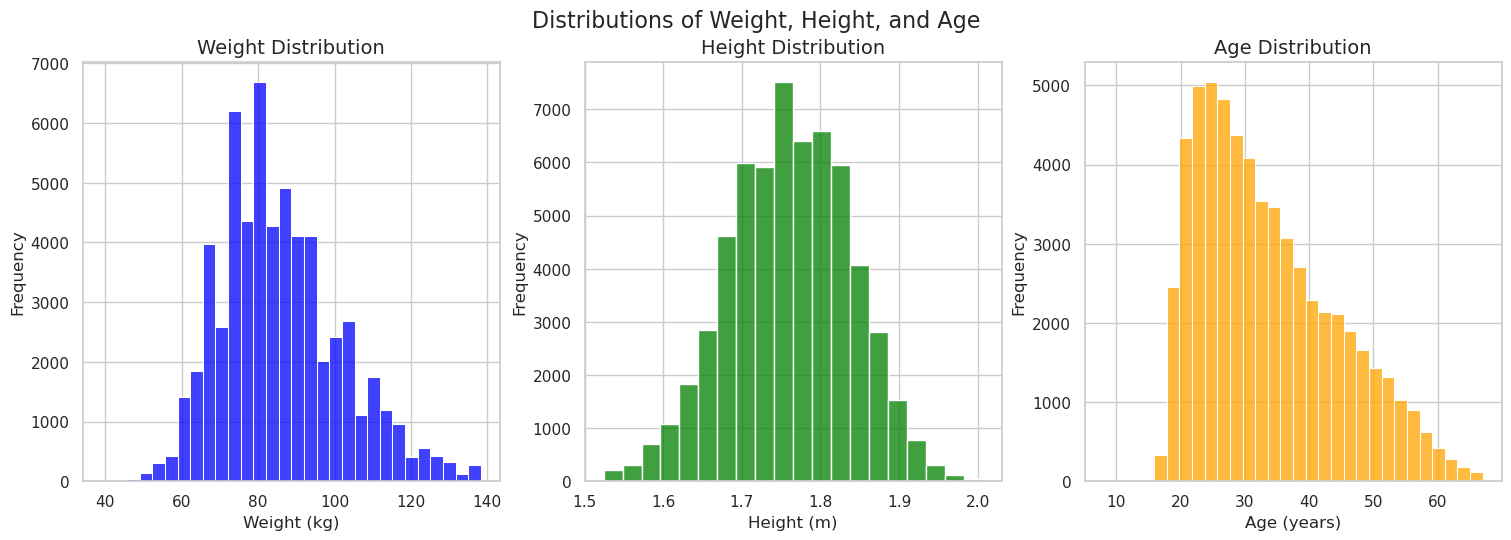

In [15]:
def plot_distributions(df):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
    
    sns.histplot(df['weight'].dropna(), bins=30, kde=False, ax=axes[0], color="blue")
    axes[0].set_title("Weight Distribution", fontsize=14)
    axes[0].set_xlabel("Weight (kg)", fontsize=12)
    axes[0].set_ylabel("Frequency", fontsize=12)
    
    sns.histplot(df['height'].dropna(), bins=20, kde=False, ax=axes[1], color="green")
    axes[1].set_title("Height Distribution", fontsize=14)
    axes[1].set_xlabel("Height (m)", fontsize=12)
    axes[1].set_ylabel("Frequency", fontsize=12)
    
    sns.histplot(df['age'].dropna(), bins=30, kde=False, ax=axes[2], color="orange")
    axes[2].set_title("Age Distribution", fontsize=14)
    axes[2].set_xlabel("Age (years)", fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)
    
    fig.suptitle("Distributions of Weight, Height, and Age", fontsize=16, y=1.05)
    
    plt.show()

plot_distributions(df)

In [16]:
print("Average Height: " + str(df['height'].mean()) + " m")
print("Average Weight: " + str(df['weight'].mean()) + " kg")

Average Height: 1.7603705447164018 m
Average Weight: 85.83854785525675 kg


(472, 476, 3)
(300, 300, 3)
(472, 476, 3)
(300, 300, 3)
(472, 476, 3)
(300, 300, 3)
(300, 300, 3)
(472, 476, 3)
(300, 300, 3)


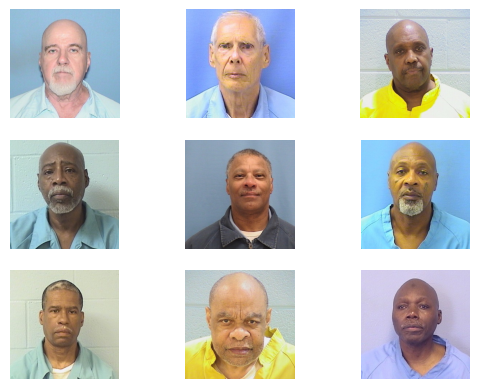

In [17]:
import cv2
x = 1
for filename in df.id:
    if x < 10:
        img_name = path+'illinois-doc-labeled-faces-dataset/front/front/'+ filename + '.jpg'
        image = cv2.imread(f"{img_name}")
        if image is not None:
            print(image.shape)
            image = cv2.cvtColor(cv2.imread(path+'illinois-doc-labeled-faces-dataset/front/front/'+filename+'.jpg'), cv2.COLOR_BGR2RGB)
            plt.subplot(3, 3, x)
            plt.axis("off")
            plt.imshow(image)
            x = x+1
    
plt.show()

(472, 476, 3)
(300, 300, 3)
(472, 476, 3)
(300, 300, 3)
(472, 476, 3)
(300, 300, 3)
(300, 300, 3)
(472, 476, 3)
(300, 300, 3)


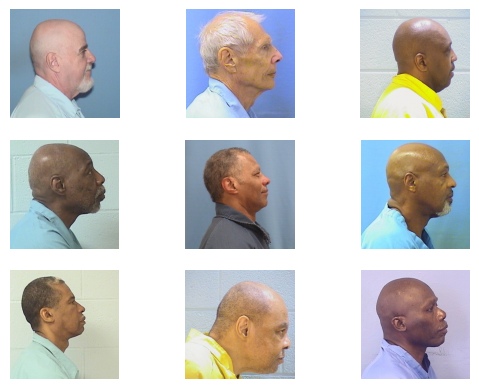

In [18]:
import cv2
x = 1
for filename in df.id:
    if x < 10:
        img_name = path+'illinois-doc-labeled-faces-dataset/side/side/'+ filename + '.jpg'
        image = cv2.imread(f"{img_name}")
        if image is not None:
            print(image.shape)
            image = cv2.cvtColor(cv2.imread(path+'illinois-doc-labeled-faces-dataset/side/side/'+filename+'.jpg'), cv2.COLOR_BGR2RGB)
            plt.subplot(3, 3, x)
            plt.axis("off")
            plt.imshow(image)
            x = x+1
    
plt.show()

-------------

# **Data Generator**

In [19]:
df.head()

id      weight                    hair   sex  height   race   eyes        bmi    category   age
0  A00147   83.914520                   Brown  Male  1.7018  White   Blue  28.974775  Overweight  33.0
1  A00220   70.306760                   Black  Male  1.8542  Black  Brown  20.449558      Normal  59.0
2  A00360   75.749864  Gray or Partially Gray  Male  1.7526  White  Green  24.661316      Normal  41.0
3  A00367  111.130040                   Black  Male  1.8288  Black  Brown  33.227605  Overweight  63.0
4  A01054   75.296272         Salt and Pepper  Male  1.7018  Black  Brown  25.998988  Overweight  34.0

In [20]:
df.shape

(59609, 10)

In [21]:
''' Removing corrupted files if dataset is not a read only file system
import os
from PIL import Image

def remove_corrupted_images(folder_path_side, folder_path_front):
    corrupted_files = []
    
    for filename in os.listdir(folder_path_side):
        file_path_side = os.path.join(folder_path_side, filename)
        
        try:
            with Image.open(file_path_side) as img:
                img.verify()
        except Exception as e:
            print(f"Corrupted image found: {file_path_side} - {e}")
            corrupted_files.append(file_path_side)
            os.remove(file_path_side)
            
            file_path_front = os.path.join(folder_path_front, filename)
            if os.path.exists(file_path_front):
                print(f"Removing corresponding front image: {file_path_front}")
                os.remove(file_path_front)
                
    for filename in os.listdir(folder_path_front):
        file_path_front = os.path.join(folder_path_front, filename)
        
        try:
            with Image.open(file_path_front) as img:
                img.verify()
        except Exception as e:
            print(f"Corrupted image found: {file_path_front} - {e}")
            corrupted_files.append(file_path_front)
            os.remove(file_path_front)
            
            file_path_side = os.path.join(folder_path_side, filename)
            if os.path.exists(file_path_side):
                print(f"Removing corresponding side image: {file_path_side}")
                os.remove(file_path_side)

    return corrupted_files

side_folder_path = "/kaggle/input/illinois-doc-labeled-faces-dataset/side/side/"
front_folder_path = "/kaggle/input/illinois-doc-labeled-faces-dataset/front/front/"

corrupted_images = remove_corrupted_images(side_folder_path, front_folder_path)

print(f"Total corrupted files removed: {len(corrupted_images)}")
'''

' Removing corrupted files if dataset is not a read only file system\nimport os\nfrom PIL import Image\n\ndef remove_corrupted_images(folder_path_side, folder_path_front):\n    corrupted_files = []\n    \n    for filename in os.listdir(folder_path_side):\n        file_path_side = os.path.join(folder_path_side, filename)\n        \n        try:\n            with Image.open(file_path_side) as img:\n                img.verify()\n        except Exception as e:\n            print(f"Corrupted image found: {file_path_side} - {e}")\n            corrupted_files.append(file_path_side)\n            os.remove(file_path_side)\n            \n            file_path_front = os.path.join(folder_path_front, filename)\n            if os.path.exists(file_path_front):\n                print(f"Removing corresponding front image: {file_path_front}")\n                os.remove(file_path_front)\n                \n    for filename in os.listdir(folder_path_front):\n        file_path_front = os.path.join(folder_p

In [22]:
from keras.utils import to_categorical
from PIL import Image
import numpy as np

TRAIN_TEST_SPLIT = 0.8

columns_to_extract = ['sex', 'race', 'eyes', 'hair']
unique_values = {col: df[col].dropna().unique().tolist() for col in columns_to_extract}

valid_race = unique_values['race']
valid_eyes = unique_values['eyes']
valid_hair = unique_values['hair']

dataset_dict = {
    'valid_race': {race: i for i, race in enumerate(valid_race)},
    'valid_eyes': {eyes: i for i, eyes in enumerate(valid_eyes)},
    'valid_hair': {hair: i for i, hair in enumerate(valid_hair)}
}

class FaceDataGenerator:
    def __init__(self, df, img_width=224, img_height=224, dataset_path='/kaggle/input/'):
        self.df = df
        self.IM_WIDTH = img_width
        self.IM_HEIGHT = img_height
        self.dataset_path = dataset_path

    def preprocess_image(self, img_path):
        try:
            with Image.open(img_path) as im:
                im = im.convert("RGB")
                im = im.resize((self.IM_WIDTH, self.IM_HEIGHT))
                im = np.array(im) / 255.0
            return im
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
            return None

    def generate_split_indexes(self):
        if len(self.df) == 0:
            raise ValueError("The DataFrame is empty. Cannot generate split indexes.")
        if len(self.df) < 3:
            raise ValueError("The DataFrame is too small for train/validation/test splits.")

        p = np.random.permutation(len(self.df))
        train_up_to = int(len(self.df) * TRAIN_TEST_SPLIT)
        train_idx = p[:train_up_to]
        test_idx = p[train_up_to:]
        train_up_to = int(train_up_to * TRAIN_TEST_SPLIT)
        train_idx, valid_idx = train_idx[:train_up_to], train_idx[train_up_to:]

        print(f"Train size: {len(train_idx)}, Validation size: {len(valid_idx)}, Test size: {len(test_idx)}")

        self.df['sex_id'] = self.df['sex'].map({'Male': 0, 'Female': 1})
        if self.df['sex_id'].isnull().any():
            raise ValueError("Some values in the `sex` column do not match the expected values ('Male', 'Female').")

        self.max_bmi = self.df['bmi'].max()

        return train_idx, valid_idx, test_idx

    def generate_images(self, image_idx, is_training, batch_size=16):
        front_images, side_images, bmis, sexes = [], [], [], []
        while True:
            for idx in image_idx:
                person = self.df.iloc[idx]
                
                front_file = f"/kaggle/input/illinois-doc-labeled-faces-dataset/front/front/{person['id']}.jpg"
                front_im = self.preprocess_image(front_file)

                side_file = f"/kaggle/input/illinois-doc-labeled-faces-dataset/side/side/{person['id']}.jpg"
                side_im = self.preprocess_image(side_file)
                
                if front_im is not None and side_im is not None:                
                    front_images.append(front_im)
                    side_images.append(side_im)
                    bmis.append(person['bmi'])
                    sexes.append(to_categorical(person['sex_id'], 2))  # Assuming binary sex (0: male, 1: female)
                    
                    if len(front_images) >= batch_size:
                        yield [np.array(front_images), np.array(side_images)], [np.array(bmis), np.array(sexes)]
                        front_images, side_images, bmis, sexes = [], [], [], []
            
            if not is_training:
                break

data_generator = FaceDataGenerator(df)

try:
    train_idx, valid_idx, test_idx = data_generator.generate_split_indexes()
    print("Train, validation, and test indexes generated successfully.")
except ValueError as e:
    print(f"Error: {e}")

/opt/conda/lib/python3.7/site-packages/botocore/httpsession.py:41: DeprecationWarning:

'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680



Train size: 38149, Validation size: 9538, Test size: 11922
Train, validation, and test indexes generated successfully.


# **Building The Model**

In [23]:
import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, concatenate
from keras.optimizers import Adam
from keras.applications import ResNet50
from keras.layers import GlobalAveragePooling2D

def r2_metric(y_true, y_pred):
    ss_total = K.sum(K.square(y_true - K.mean(y_true)))
    ss_residual = K.sum(K.square(y_true - y_pred))
    return 1 - ss_residual / (ss_total + K.epsilon())

def pearson_coefficient(y_true, y_pred):
    mean_y_true = K.mean(y_true)
    mean_y_pred = K.mean(y_pred)
    covariance = K.mean((y_true - mean_y_true) * (y_pred - mean_y_pred))
    std_y_true = K.std(y_true)
    std_y_pred = K.std(y_pred)
    return covariance / (std_y_true * std_y_pred + K.epsilon())

height = width = 224

# Load ResNet50 as the base model for both front and side images
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, 3))

# Front Image Model
front_input = Input(shape=(height, width, 3), name="front_input")
x1 = resnet_base(front_input)
x1 = GlobalAveragePooling2D()(x1)
x1 = Dropout(0.5)(x1)
x1 = Dense(128, activation='relu')(x1)

# Side Image Model
side_input = Input(shape=(height, width, 3), name="side_input")
x2 = resnet_base(side_input)
x2 = GlobalAveragePooling2D()(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(128, activation='relu')(x2)

# Fusion Layer
fused = concatenate([x1, x2])
fused = Dense(256, activation="relu")(fused)
fused = Dropout(0.5)(fused)

# Outputs
bmi_output = Dense(1, name="bmi_output")(fused)  # Regression output
sex_output = Dense(2, activation='softmax', name="sex_output")(fused)  # Binary classification output (Male/Female)

# Model
model = Model(inputs=[front_input, side_input], outputs=[bmi_output, sex_output])

# Compile Model
model.compile(
    optimizer=Adam(),
    loss={'bmi_output': 'mse', 'sex_output': 'categorical_crossentropy'},
    metrics={
        'bmi_output': ['mae', 'mse', r2_metric, pearson_coefficient],
        'sex_output': ['accuracy']
    }
)

model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 front_input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 side_input (InputLayer)        [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['front_input[0][0]',            
                             

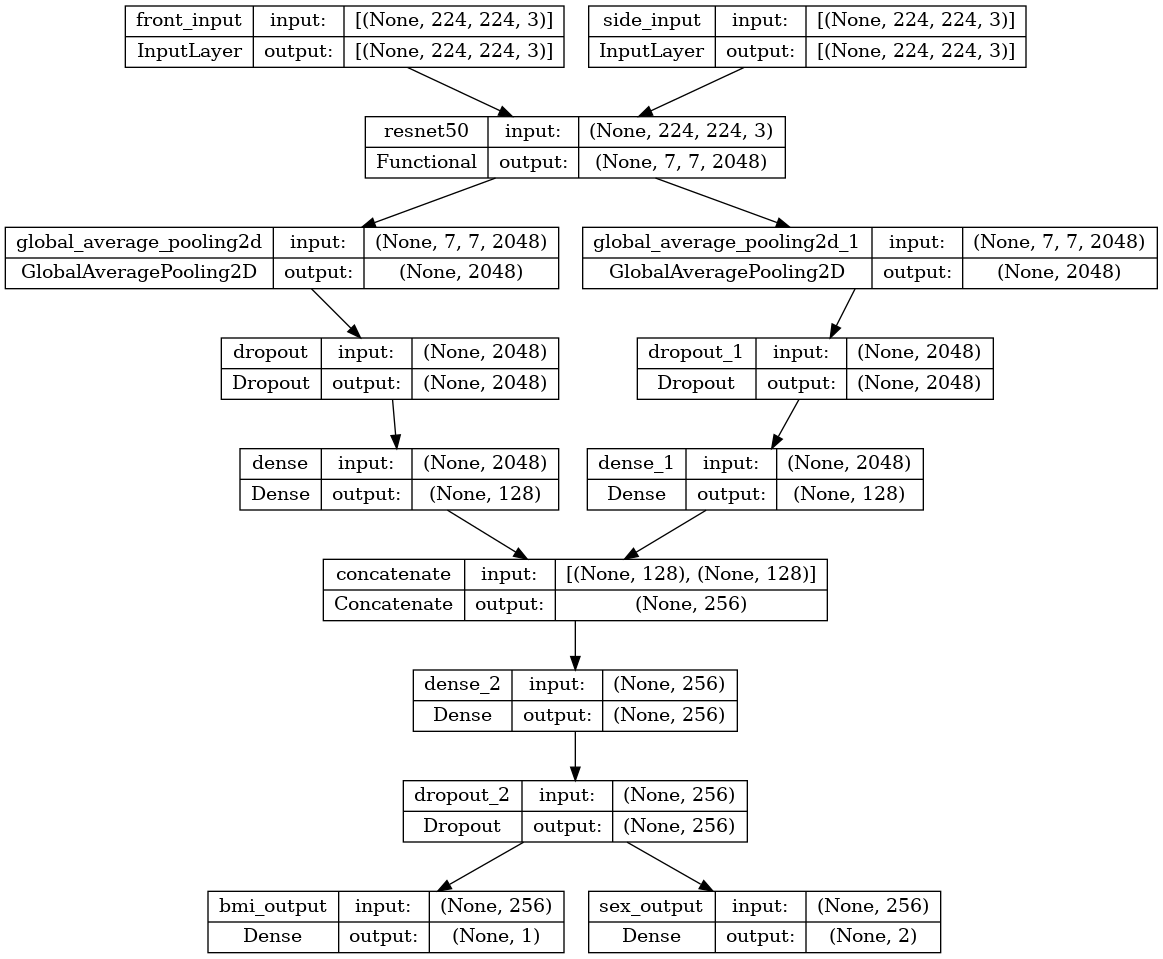

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
history = model.fit(
    data_generator.generate_images(train_idx, is_training=True, batch_size=32),
    validation_data=data_generator.generate_images(valid_idx, is_training=False, batch_size=32),
    steps_per_epoch=len(train_idx) // 32,
    validation_steps=len(valid_idx) // 32,
    epochs=20
)

Error processing image /kaggle/input/illinois-doc-labeled-faces-dataset/side/side/X72745.jpg: cannot identify image file '/kaggle/input/illinois-doc-labeled-faces-dataset/side/side/X72745.jpg'
Error processing image /kaggle/input/illinois-doc-labeled-faces-dataset/side/side/X78821.jpg: cannot identify image file '/kaggle/input/illinois-doc-labeled-faces-dataset/side/side/X78821.jpg'
Epoch 1/20
  13/1192 [..............................] - ETA: 23:06 - loss: 198.0193 - bmi_output_loss: 197.3629 - sex_output_loss: 0.6563 - bmi_output_mae: 10.7122 - bmi_output_mse: 197.3629 - bmi_output_r2_metric: -10.5573 - bmi_output_pearson_coefficient: -0.0037 - sex_output_accuracy: 0.8654Error processing image /kaggle/input/illinois-doc-labeled-faces-dataset/side/side/X78980.jpg: cannot identify image file '/kaggle/input/illinois-doc-labeled-faces-dataset/side/side/X78980.jpg'
Error processing image /kaggle/input/illinois-doc-labeled-faces-dataset/side/side/X72773.jpg: cannot identify image file '/kag

In [26]:
model.save('my_model.h5')

### **Metrics**

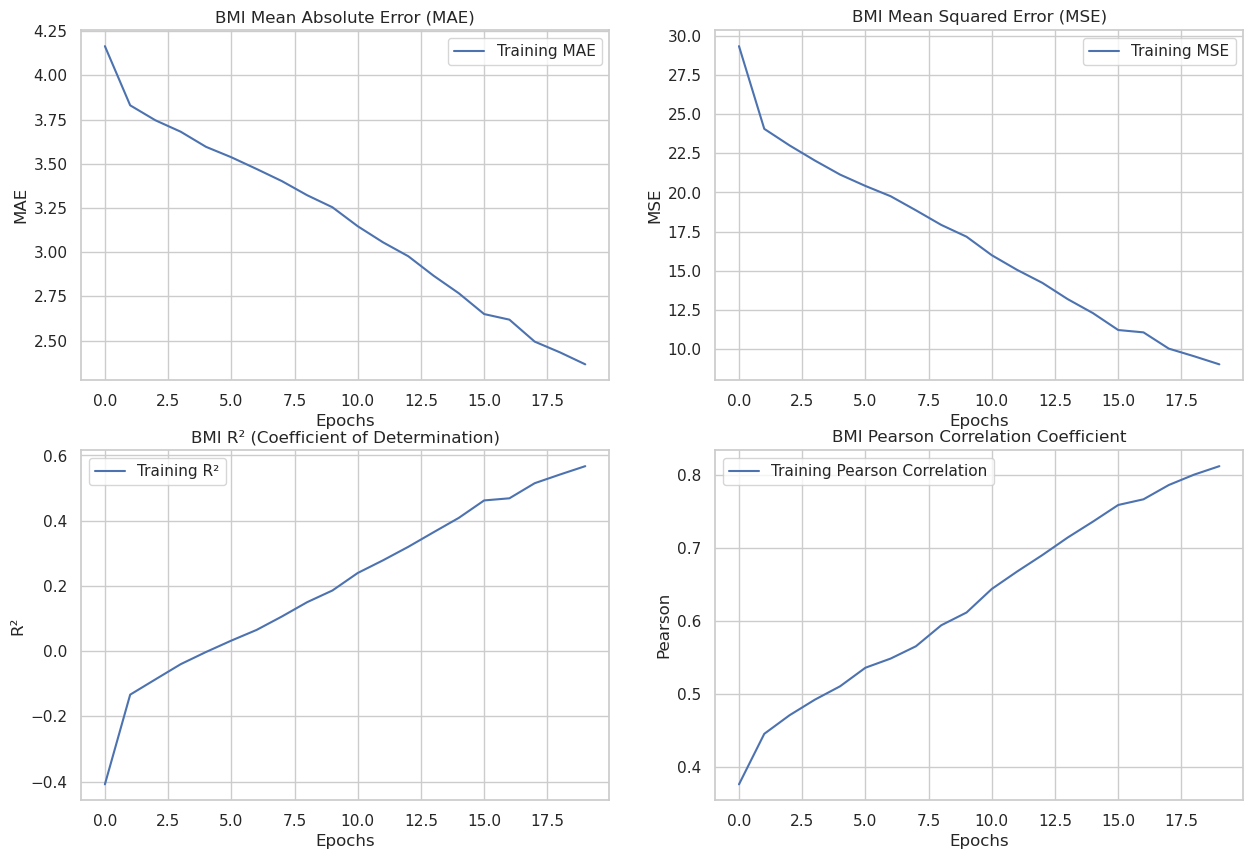

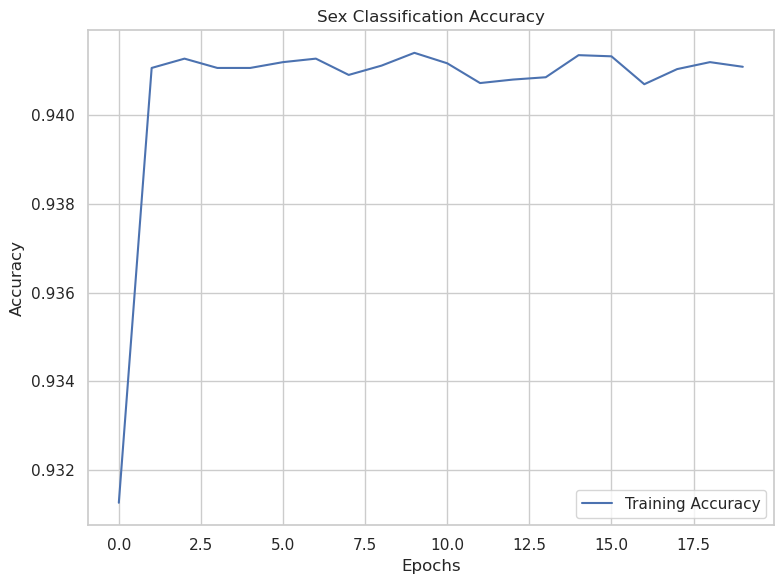

In [27]:
import matplotlib.pyplot as plt

history_bmi_mae = history.history['bmi_output_mae']
history_bmi_mse = history.history['bmi_output_mse']
history_bmi_r2 = history.history['bmi_output_r2_metric']
history_bmi_pearson = history.history['bmi_output_pearson_coefficient']
history_sex_accuracy = history.history['sex_output_accuracy']

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(history_bmi_mae, label='Training MAE')
plt.title('BMI Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_bmi_mse, label='Training MSE')
plt.title('BMI Mean Squared Error (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history_bmi_r2, label='Training R²')
plt.title('BMI R² (Coefficient of Determination)')
plt.xlabel('Epochs')
plt.ylabel('R²')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_bmi_pearson, label='Training Pearson Correlation')
plt.title('BMI Pearson Correlation Coefficient')
plt.xlabel('Epochs')
plt.ylabel('Pearson')
plt.legend()

plt.figure(figsize=(8, 6))
plt.plot(history_sex_accuracy, label='Training Accuracy')
plt.title('Sex Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Evaluating our model on the test set**

In [28]:
import numpy as np
import matplotlib.pyplot as plt

test_batch_size = 16

test_generator = data_generator.generate_images(test_idx, is_training=False, batch_size=test_batch_size)

bmi_true = []
sex_true = []

bmi_predictions = []
sex_predictions = []

for images, labels in test_generator:
    bmi_true.append(labels[0])
    sex_true.append(labels[1])

    preds = model.predict([images[0], images[1]], batch_size=test_batch_size)

    bmi_predictions.append(preds[0])
    sex_predictions.append(preds[1])

bmi_true = np.concatenate(bmi_true)
sex_true = np.concatenate(sex_true)

bmi_predictions = np.concatenate(bmi_predictions)
sex_predictions = np.concatenate(sex_predictions)

1/1 [==============================] - 0s 46ms/step
Error processing image /kaggle/input/illinois-doc-labeled-faces-dataset/side/side/X79020.jpg: cannot identify image file '/kaggle/input/illinois-doc-labeled-faces-dataset/side/side/X79020.jpg'
1/1 [==============================] - 0s 38ms/step
Error processing image /kaggle/input/illinois-doc-labeled-faces-dataset/side/side/X77472.jpg: cannot identify image file '/kaggle/input/illinois-doc-labeled-faces-dataset/side/side/X77472.jpg'
1/1 [==============================] - 0s 39ms/step
Error processing image /kaggle/input/illinois-doc-labeled-faces-dataset/side/side/Y13472.jpg: cannot identify image file '/kaggle/input/illinois-doc-labeled-faces-dataset/side/side/Y13472.jpg'
1/1 [==============================] - 0s 39ms/step
Error processing image /kaggle/input/illinois-doc-labeled-faces-dataset/side/side/C71822.jpg: cannot identify image file '/kaggle/input/illinois-doc-labeled-faces-dataset/side/side/C71822.jpg'
Error processing ima

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

bmi_mae = mean_absolute_error(bmi_true, bmi_predictions)
bmi_mse = mean_squared_error(bmi_true, bmi_predictions)
bmi_r2 = r2_score(bmi_true, bmi_predictions)
bmi_pearson, _ = pearsonr(bmi_true, bmi_predictions)

print(f"BMI MAE: {bmi_mae}")
print(f"BMI MSE: {bmi_mse}")
print(f"BMI R²: {bmi_r2}")
print(f"BMI Pearson Correlation Coefficient: {bmi_pearson}")

BMI MAE: 3.1153975215631817
BMI MSE: 16.752241924297635
BMI R²: 0.27885573378518813
BMI Pearson Correlation Coefficient: [0.6091947704766771]


In [30]:
from sklearn.metrics import accuracy_score

sex_accuracy = accuracy_score(sex_true, np.round(sex_predictions))

print(f"Sex Accuracy: {sex_accuracy}")

Sex Accuracy: 0.9381793478260869


In [31]:
img_width = 224
img_height = 224

def preprocess_image(img_path):
    try:
        img = Image.open(img_path)
        img = img.convert("RGB")
        img = img.resize((img_width, img_height))
        img_array = np.array(img) / 255.0
        return img_array
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        return None

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    else:
        return 'Overweight'

def customImageTest(front_image_path, side_image_path):
    front_image = preprocess_image(front_image_path)
    side_image = preprocess_image(side_image_path)
    
    if front_image is None or side_image is None:
        print("One of the images is invalid. Please check the file paths.")
    else:
        front_image = np.expand_dims(front_image, axis=0)  # Add batch dimension
        side_image = np.expand_dims(side_image, axis=0)  # Add batch dimension
    
        bmi_prediction, sex_prediction = model.predict([front_image, side_image])
    
        predicted_bmi = bmi_prediction[0][0]
        predicted_sex = np.argmax(sex_prediction[0])
    
        bmi_category = categorize_bmi(predicted_bmi)
    
        print(f"Predicted BMI: {predicted_bmi}")
        print(f"BMI Category: {bmi_category}")
        print(f"Predicted Sex: {'Male' if predicted_sex == 0 else 'Female'}")

In [38]:
customImageTest('/kaggle/input/friendimages/amar_front.jpg', '/kaggle/input/friendimages/amar_side.jpg')

1/1 [==============================] - 2s 2s/step
Predicted BMI: 23.47286033630371
BMI Category: Normal
Predicted Sex: Male


In [39]:
customImageTest('/kaggle/input/friendimages/bhuvan_front.jpg', '/kaggle/input/friendimages/bhuvan_side.jpg')

1/1 [==============================] - 0s 36ms/step
Predicted BMI: 26.2199649810791
BMI Category: Overweight
Predicted Sex: Male


In [40]:
customImageTest('/kaggle/input/friendimages/lokesh_front.jpg', '/kaggle/input/friendimages/lokesh_side.jpg')

1/1 [==============================] - 0s 38ms/step
Predicted BMI: 22.423913955688477
BMI Category: Normal
Predicted Sex: Male
